In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from taxiDataset import taxiDataset

/opt/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [99]:
sample_percentage = .10
df = pd.read_csv('./assets/year-df-clean.csv')
dataset_size = df.shape[0]

train, valid = train_test_split(df, test_size=0.1)

regr = RandomForestRegressor(n_estimators=40, n_jobs=-1, max_features=2)

xTrain = train.drop(['pickups', 'ind'], axis=1)
yTrain = train['pickups']

xTest = valid.drop(['pickups', 'ind'], axis=1)
yTest = valid['pickups']

regr.fit(xTrain, yTrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=40, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [100]:
for key in xTrain.keys():
    print(key)

print(regr.feature_importances_)

PULocationID
day_of_week
t_bucket
month_of_year
[0.76631311 0.04236696 0.13560345 0.05571648]


79.87604166666667
210.4575


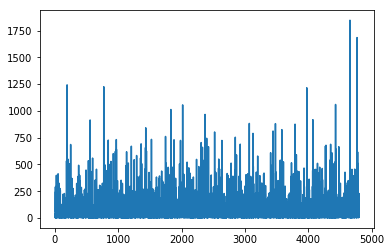

In [144]:
predictions = regr.predict(xTest)
predictions = predictions.astype(int)

train_pred = regr.predict(xTrain)
train_pred = predictions.astype(int)

diff = np.abs(predictions - yTest)

print(np.mean(diff))
print(np.mean(yTest))

x = np.linspace(0, 4799, 4800)
plt.plot(x, diff)
plt.show()

In [2]:
sample_percentage = .10
df = pd.read_csv('./assets/year-df-clean.csv')
dataset_size = df.shape[0]

train, valid = train_test_split(df, test_size=0.05)

regr = RandomForestRegressor(n_estimators=40, n_jobs=-1)

xTrain = train.drop(['pickups', 'ind'], axis=1)
yTrain = train['pickups']

xTest = valid.drop(['pickups', 'ind'], axis=1)
yTest = valid['pickups']

regr.fit(xTrain, yTrain)

print(regr.feature_importances_)

[0.72841821 0.05574514 0.19639373 0.01944293]


31.98875
216.05625


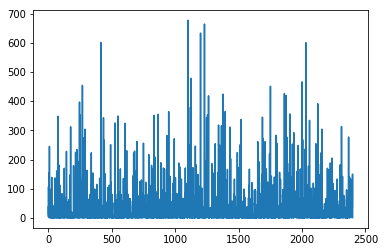

In [48]:
predictions = regr.predict(xTest)
predictions = predictions.astype(int)

train_pred = regr.predict(xTrain)
train_pred = predictions.astype(int)

diff = np.abs(predictions - yTest)

print(np.mean(diff))
print(np.mean(yTest))

x = np.linspace(0, 2399, 2400)
plt.plot(x, diff)
plt.show()

In [76]:
# print(diff)
diff = diff.reset_index(drop=True)

# print(diff.idxmax())

print(yTest[13009])
print(predictions[1102])

#diff[13009]
# yTest[13009]

# print(type(predictions))
# final = yTest



# print(final)
# final['pred'] = predictions.tolist()
# final[13009]

# train[13009]

# diff.drop('ind')
# print(diff.idxmax(axis=1))
# print(predictions[diff.idxmax])

# print(predictions[176])
# print(yTest.iloc[176])

78
755
